In [59]:
cat('Last updated ', date())

Last updated  Tue Oct 18 15:42:21 2022

In [60]:
R.version

               _                           
platform       x86_64-w64-mingw32          
arch           x86_64                      
os             mingw32                     
system         x86_64, mingw32             
status                                     
major          4                           
minor          1.3                         
year           2022                        
month          03                          
day            10                          
svn rev        81868                       
language       R                           
version.string R version 4.1.3 (2022-03-10)
nickname       One Push-Up                 

In [61]:
setwd('C:/Users/shims/Desktop/TImeSeries')

### Analyze the disposable personal income (dpi) of the U.S in the file “dpi.txt”.

#### Step1. Draw time series plot

First we draw the time series plot of the disposable personal income (dpi). In this step, we can investigate the data whether it has any pattern or unusual observation. This time series data, named dpi, does not have an outlier deviating from a timeseries plot. However, dpi has a trend. This is obvious that the data is not stationary, and we might need transformation or differencing the data.    

In [2]:
dpi_data <-read.delim("dpi.txt", sep = "", header = FALSE)
head(dpi_data)
dpi<-dpi_data$V4

,V1,V2,V3,V4
,<int>,<int>,<int>,<dbl>
1,1947,1,1,168.4
2,1947,4,1,166.2
3,1947,7,1,174.0
4,1947,10,1,176.2
5,1948,1,1,181.1
6,1948,4,1,189.3


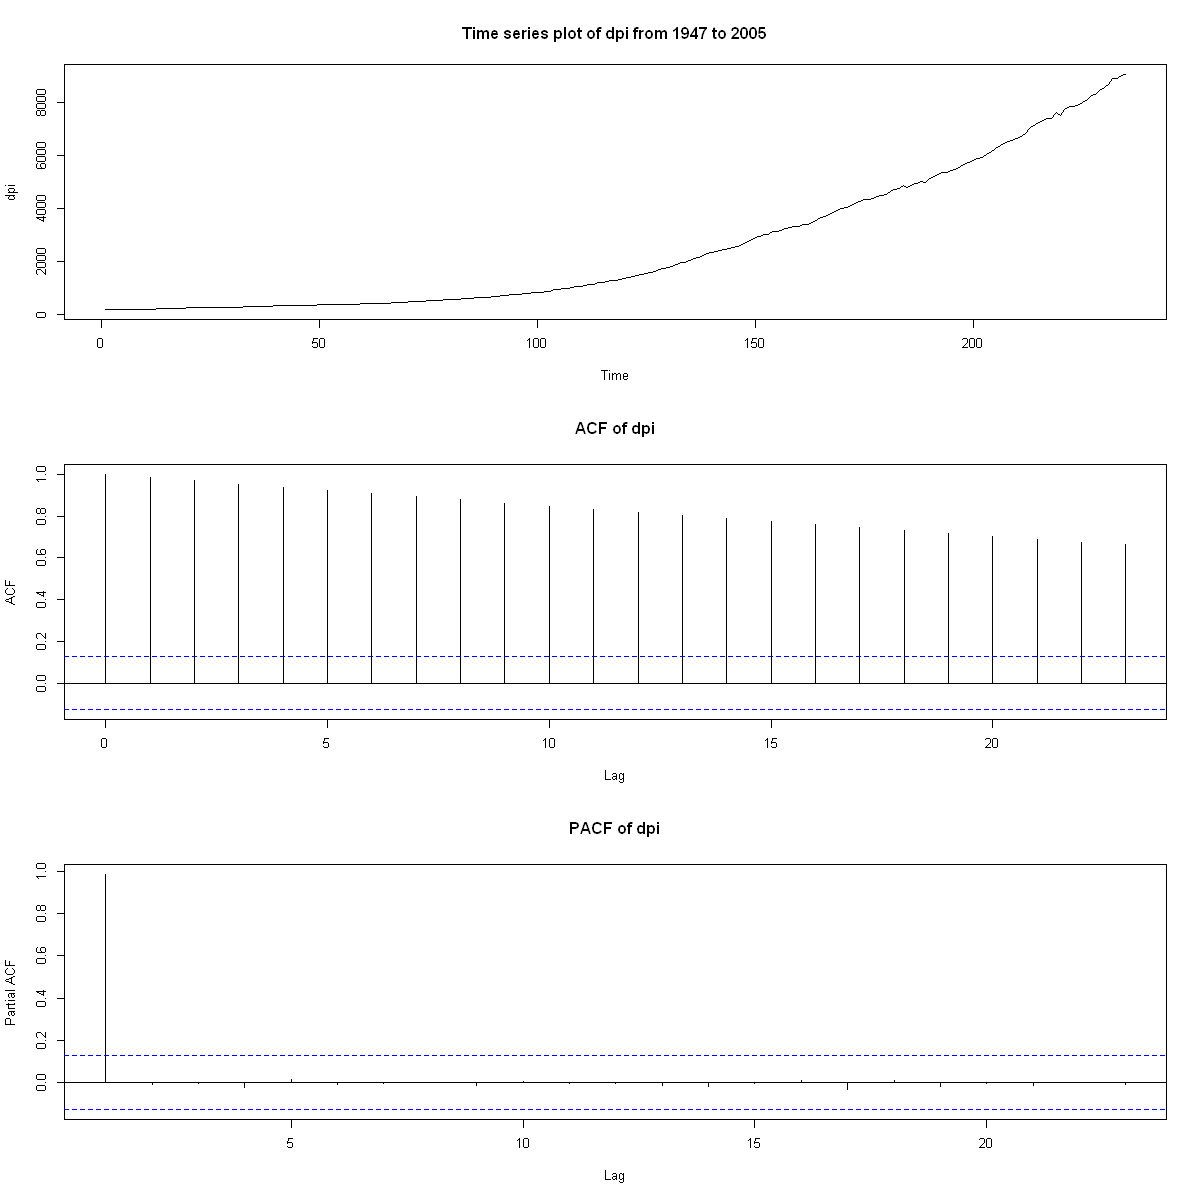

In [5]:
#ts.plot
options(repr.plot.width=10, repr.plot.height=10)
par(mfrow=c(3,1))
ts.plot(dpi, main="Time series plot of dpi from 1947 to 2005")
acf(dpi, main="ACF of dpi")
pacf(dpi, main="PACF of dpi")

#### Step2. Transformation

We consider the three different data transformations. Note that we use the logarithm of the _dpi_ since _dpi_ is also exponentially growing. Thus, the difference between _ln(dpi)_ will give a clear growth rate.  

1. __ln(dpi)__: logarithm of the dpi
    * Formula: $ln(dpi)$


2. __diff1_ln(dpi)__: $1^{st}$ order differencing the $ln(dpi)$
    * Formula: $ln⁡(dpi_t)-ln⁡(dpi_{t-1})$
    
    
3. __diff2_ln(dpi)__: $2^{nd}$ order differencing the $ln(dpi)$
    * Formula: diff1_$ln⁡(dpi_t)-$diff1_$ln⁡(dpi_{t-1})$

We investigate the possible transformation by time-series plot, ACF, PACF, and Dickey–Fuller Test. As a result, 3.diff2_ln(dpi) satisfies the time series stationarity. Thus, we use model 3 to fit a model. See the following results for details. 

In [7]:
# install.packages('tseries')

In [10]:
library(tseries)

__1.ln(dpi)__ is not stationary. 


	Augmented Dickey-Fuller Test

data:  ln_dpi
Dickey-Fuller = -1.9333, Lag order = 15, p-value = 0.6039
alternative hypothesis: stationary


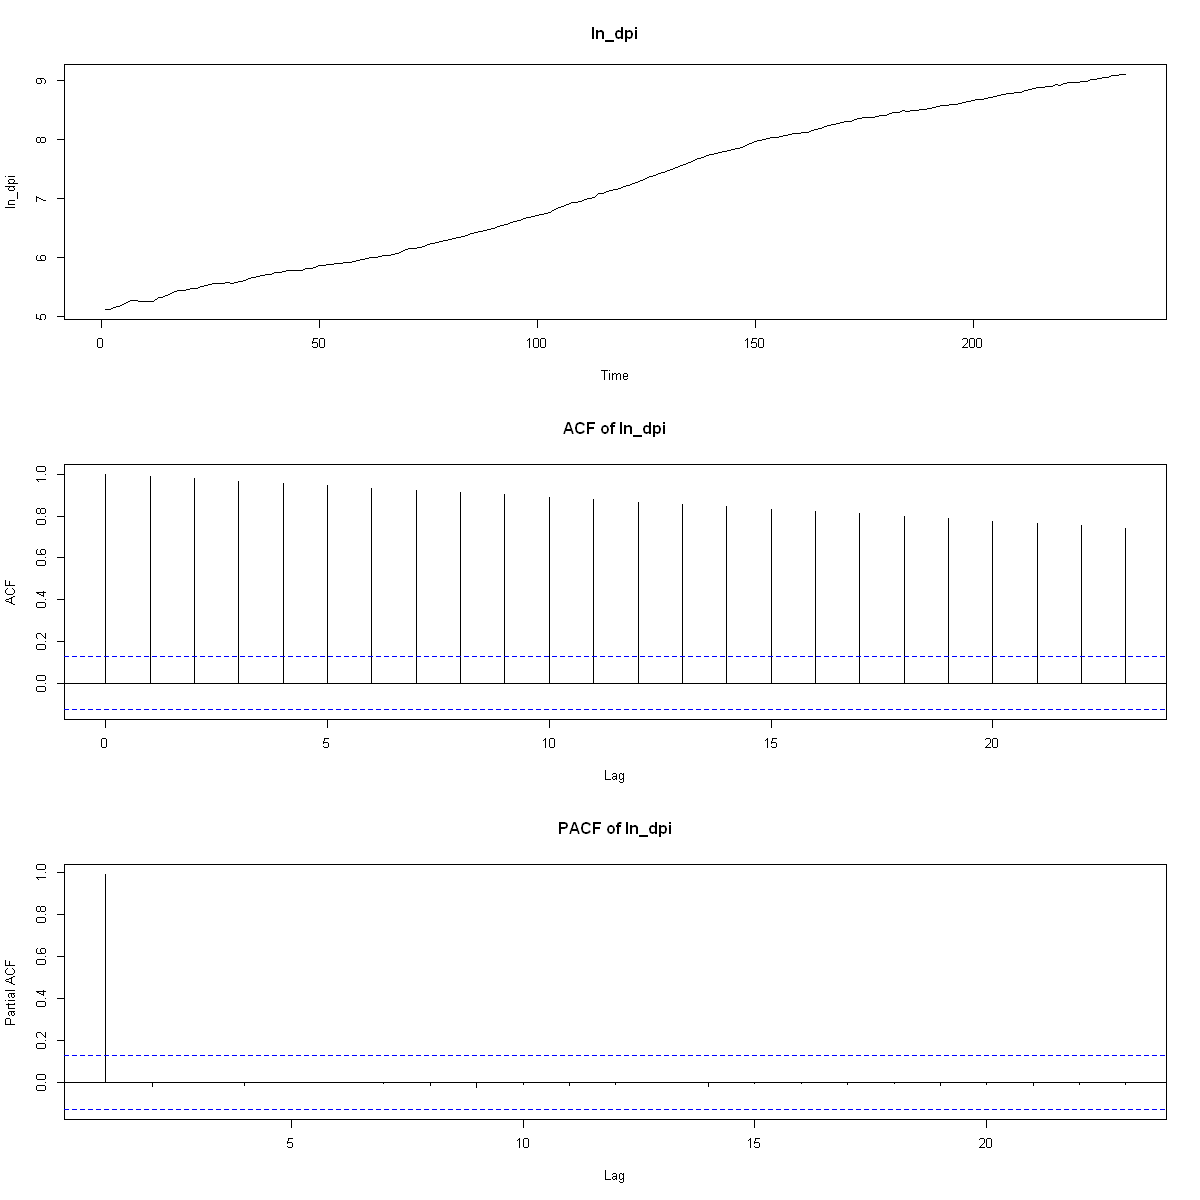

In [11]:
#ln_dpi
ln_dpi <-log(dpi)
par(mfrow=c(3,1))
ts.plot(ln_dpi, main="ln_dpi")
acf(ln_dpi,  main="ACF of ln_dpi")
pacf(ln_dpi, main="PACF of ln_dpi")
adf.test(ln_dpi,k=15, alternative="stationary")

__2.diff1_ln(dpi)__ is also not stationary


	Augmented Dickey-Fuller Test

data:  diff1_ln_dpi
Dickey-Fuller = -1.5738, Lag order = 15, p-value = 0.755
alternative hypothesis: stationary


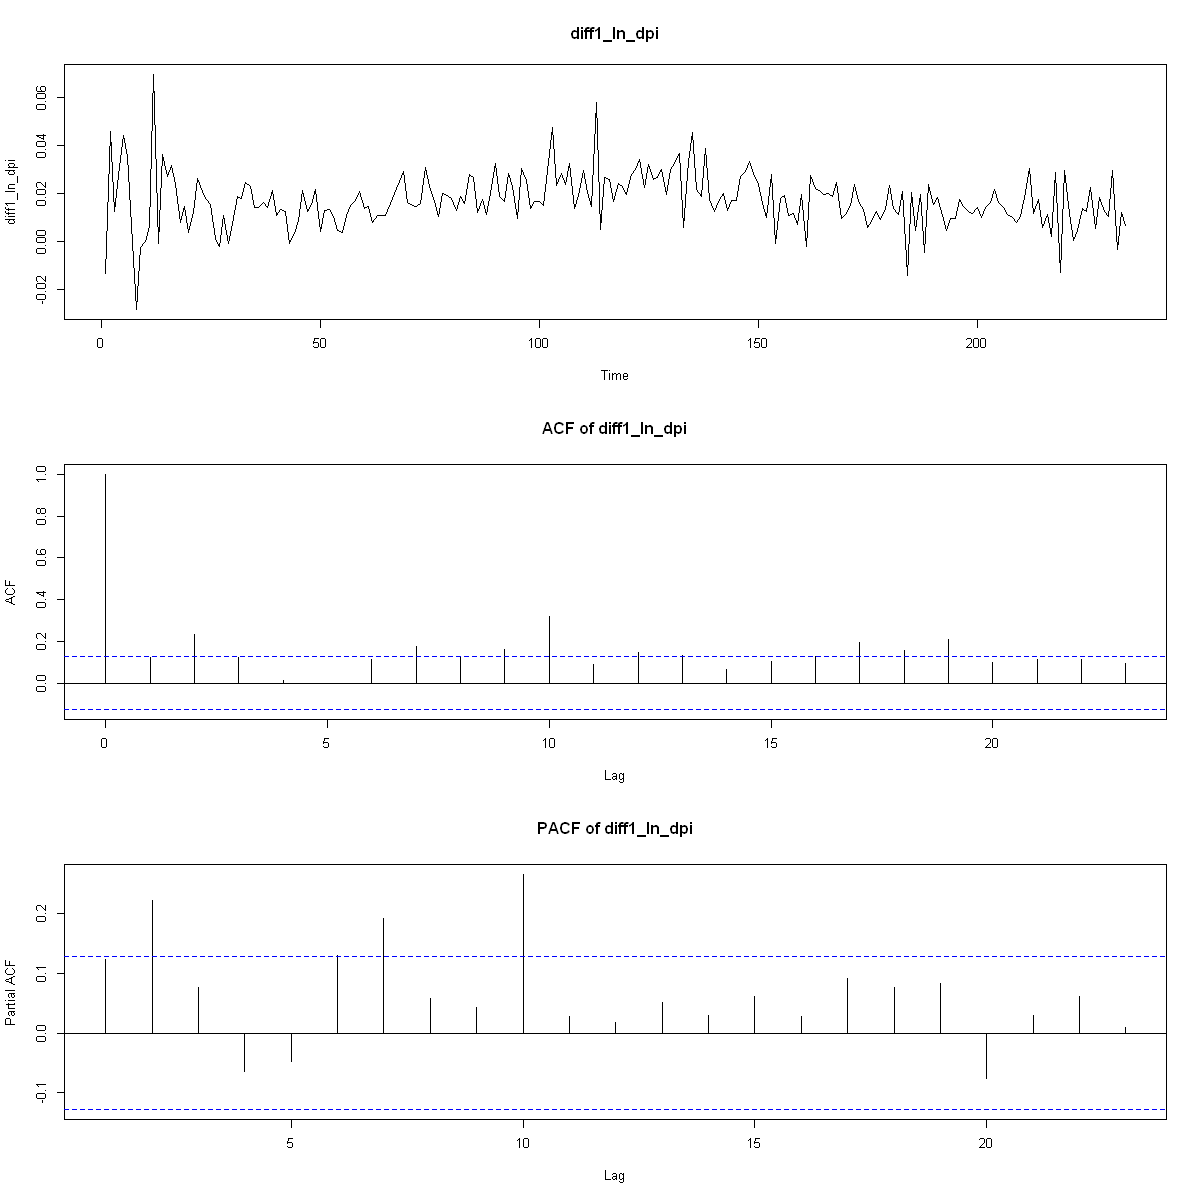

In [12]:
#diff1_ln_dpi
diff1_ln_dpi <-diff(ln_dpi)
par(mfrow=c(3,1))
ts.plot(diff1_ln_dpi, main="diff1_ln_dpi")
acf(diff1_ln_dpi,  main="ACF of diff1_ln_dpi")
pacf(diff1_ln_dpi, main="PACF of diff1_ln_dpi")
adf.test(diff1_ln_dpi,k=15, alternative="stationary")

__3.diff2_ln(gdp) is stationary.__

The diff2_ln(dpi), 2nd order differencing of ln(dpi), seems to be stationary since the time series plot does not have a trend and ACF is decreasing. <br>This is confirmed by the Dickey–Fuller Test ($H_0$: non-stationary,$H_1$:stationay) at $\alpha$ level 0.05 since we reject the null hypothesis based on p-value=0.01< 0.05.

Warning message in adf.test(diff2_ln_dpi, k = 15, alternative = "stationary"):
"p-value smaller than printed p-value"



	Augmented Dickey-Fuller Test

data:  diff2_ln_dpi
Dickey-Fuller = -6.7356, Lag order = 15, p-value = 0.01
alternative hypothesis: stationary


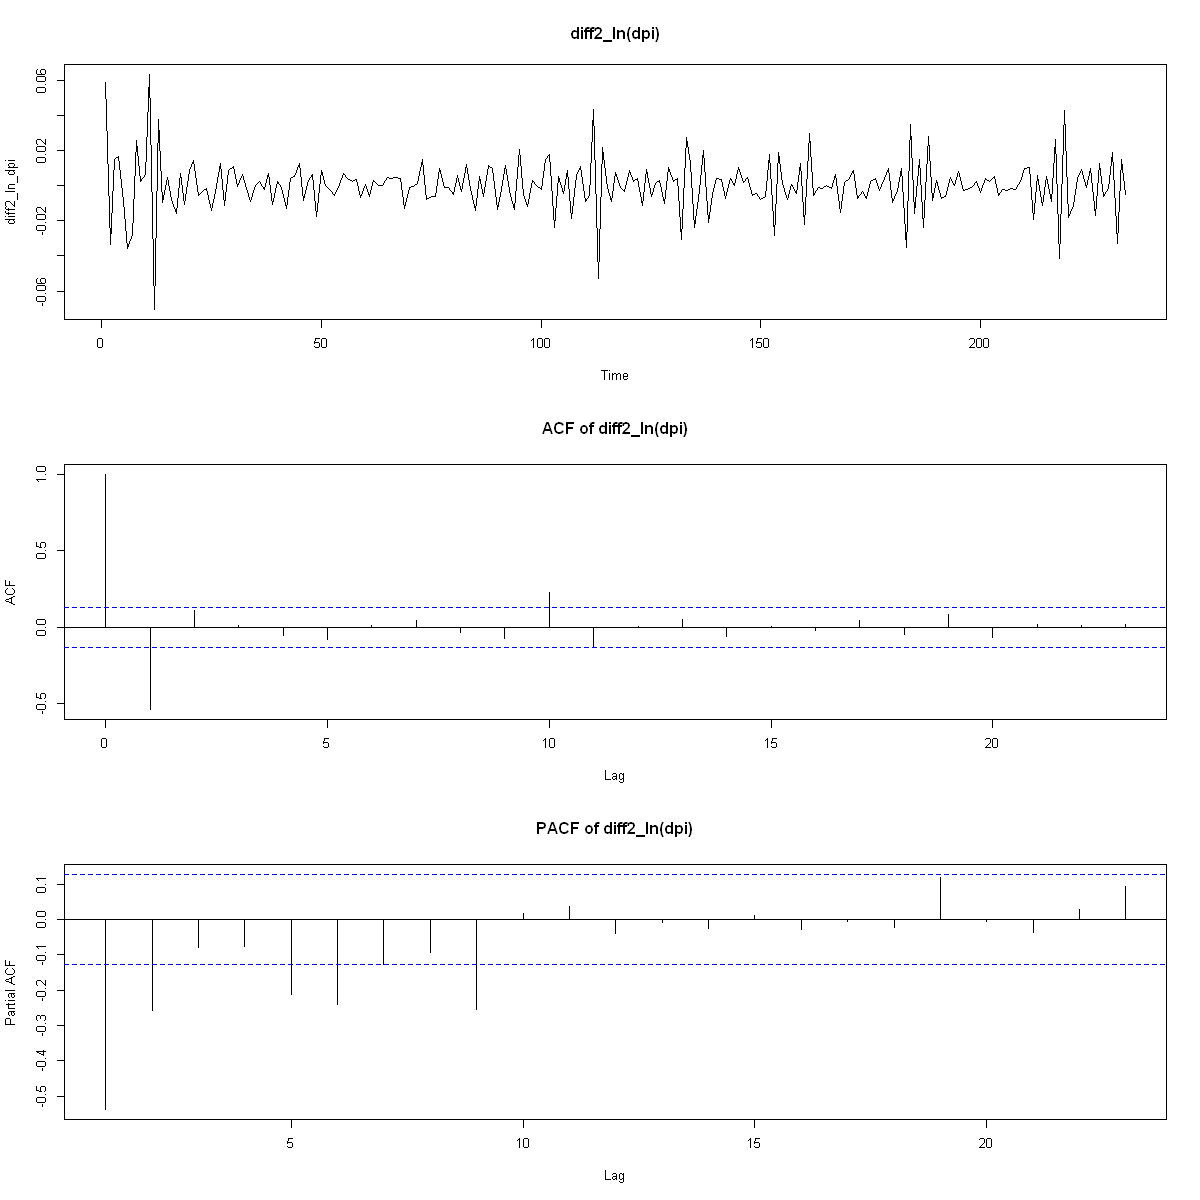

In [14]:
#diff2_ln_dpi
diff2_ln_dpi <-diff(diff1_ln_dpi)
par(mfrow=c(3,1))
ts.plot(diff2_ln_dpi, main="diff2_ln(dpi)")
acf(diff2_ln_dpi,  main="ACF of diff2_ln(dpi)")
pacf(diff2_ln_dpi, main="PACF of diff2_ln(dpi)")
adf.test(diff2_ln_dpi,k=15, alternative="stationary")

#### Step3. Fit a model

In this step, we fit a ARMA model. Since the data are seasonally adjusted, we do not consider seasonal ARMA model. To find the order of ARMA(p,q), auto.arima function in R is used.  ARMA(0,3) has been decided. Next step is to check whether the residual is independent. 

In [15]:
# install.packages('forecast')

In [16]:
library(forecast)

In [17]:
#diff2_ln_dpi
###auto.arima
forecast::auto.arima(diff2_ln_dpi)

Series: diff2_ln_dpi 
ARIMA(2,0,1) with zero mean 

Coefficients:
          ar1     ar2      ma1
      -0.0190  0.1214  -0.9335
s.e.   0.0705  0.0710   0.0225

sigma^2 = 0.0001184:  log likelihood = 723.3
AIC=-1438.61   AICc=-1438.43   BIC=-1424.81

#### Step4. Residual independence check

$H_0:\{\epsilon_t\}$is a white noise process. <br>
__diff2_ln(dpi)__  ~ ARMA(2,1) has a white noise process by Box-Pierce test since its p-value=0.0053 is less than the $\alpha$ level at 0.05.  Therefore, the finalized model is __diff2_ln(dpi)__  ~ ARMA(2,1) with coefficients $\phi=(-0.0194, 0.1213)$ and $\theta= -0.9339.$

Series: diff2_ln_dpi 
ARIMA(2,0,1) with non-zero mean 

Coefficients:
          ar1     ar2      ma1   mean
      -0.0194  0.1213  -0.9339  0e+00
s.e.   0.0705  0.0710   0.0225  1e-04

sigma^2 = 0.0001188:  log likelihood = 723.37
AIC=-1436.73   AICc=-1436.47   BIC=-1419.48


	Box-Pierce test

data:  res2
X-squared = 28.138, df = 12, p-value = 0.00528


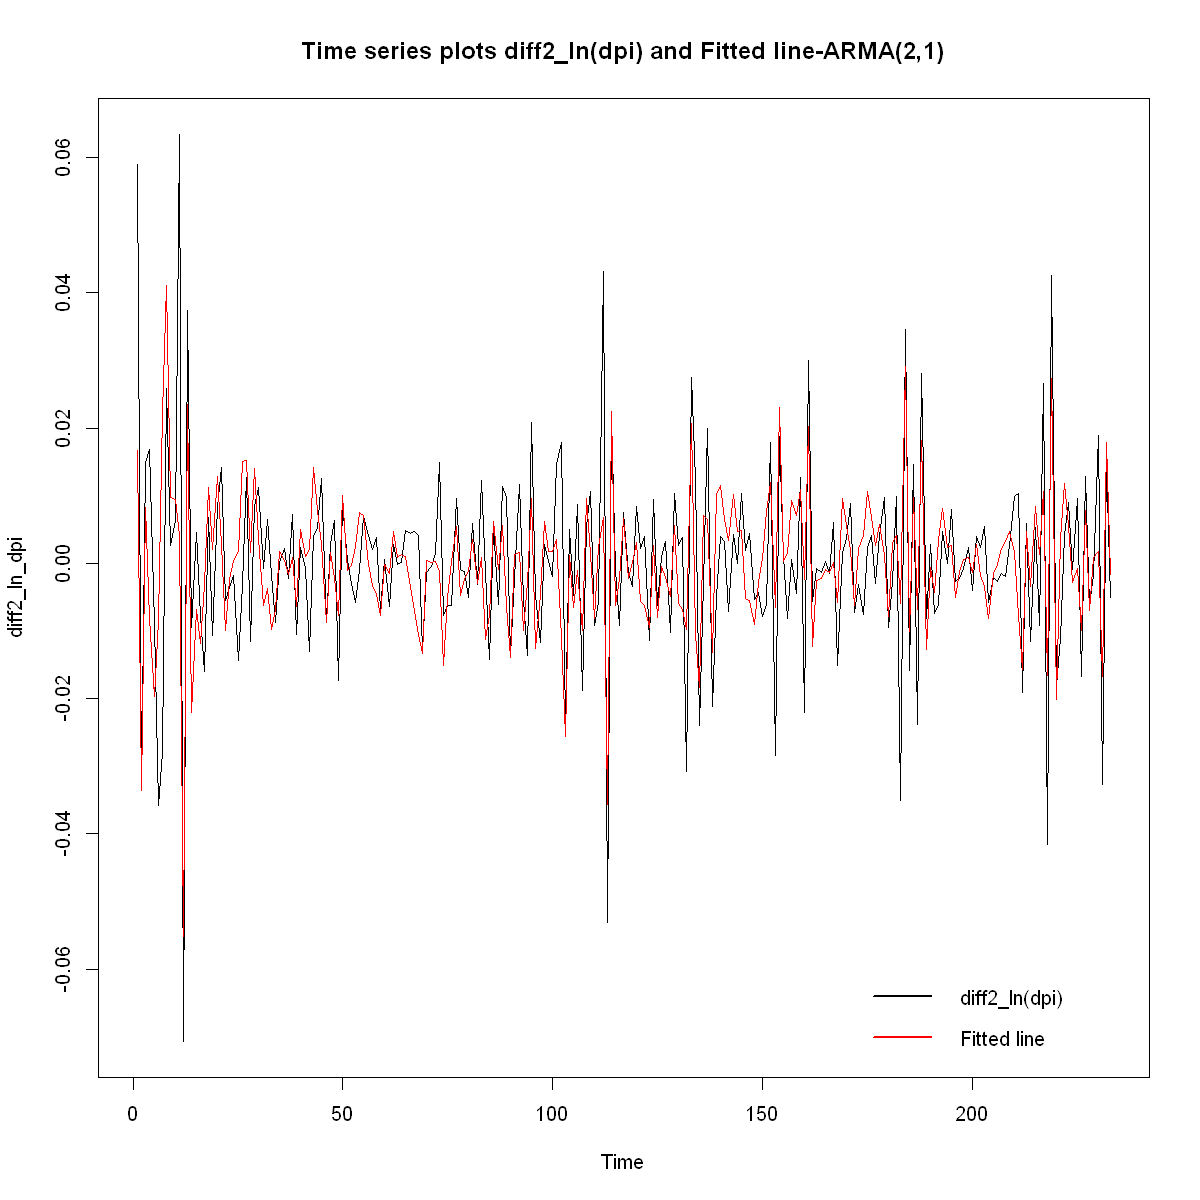

In [22]:
#diff2_ln(dpi)
fit2 <-Arima(diff2_ln_dpi, order=c(2,0,1))
fit2
ts.plot(diff2_ln_dpi, main="Time series plots diff2_ln(dpi) and Fitted line-ARMA(2,1)")
points(fit2$fitted,col = 'red', type = 'l')

legend("bottomright", c("diff2_ln(dpi)","Fitted line"), col = c("black", "red")
       ,inset = c(0,0), lty = c(1,1,0),bty="n", cex = 1, lwd = 2 )

res2=residuals(fit2)
Box.test(res2, lag = 15, type = c("Box-Pierce"), fitdf =3)


#### Step5. 1 to 5 steps ahead forecast. 

We use the forecast function in the forecast package (forecast::forecast) is R. 

    Point Forecast       Lo 95      Hi 95
234   5.078997e-03 -0.01628562 0.02644361
235  -7.332668e-04 -0.03025113 0.02878460
236   6.124692e-04 -0.02905603 0.03028097
237  -1.184026e-04 -0.02989438 0.02965758
238   5.895949e-05 -0.02971986 0.02983778

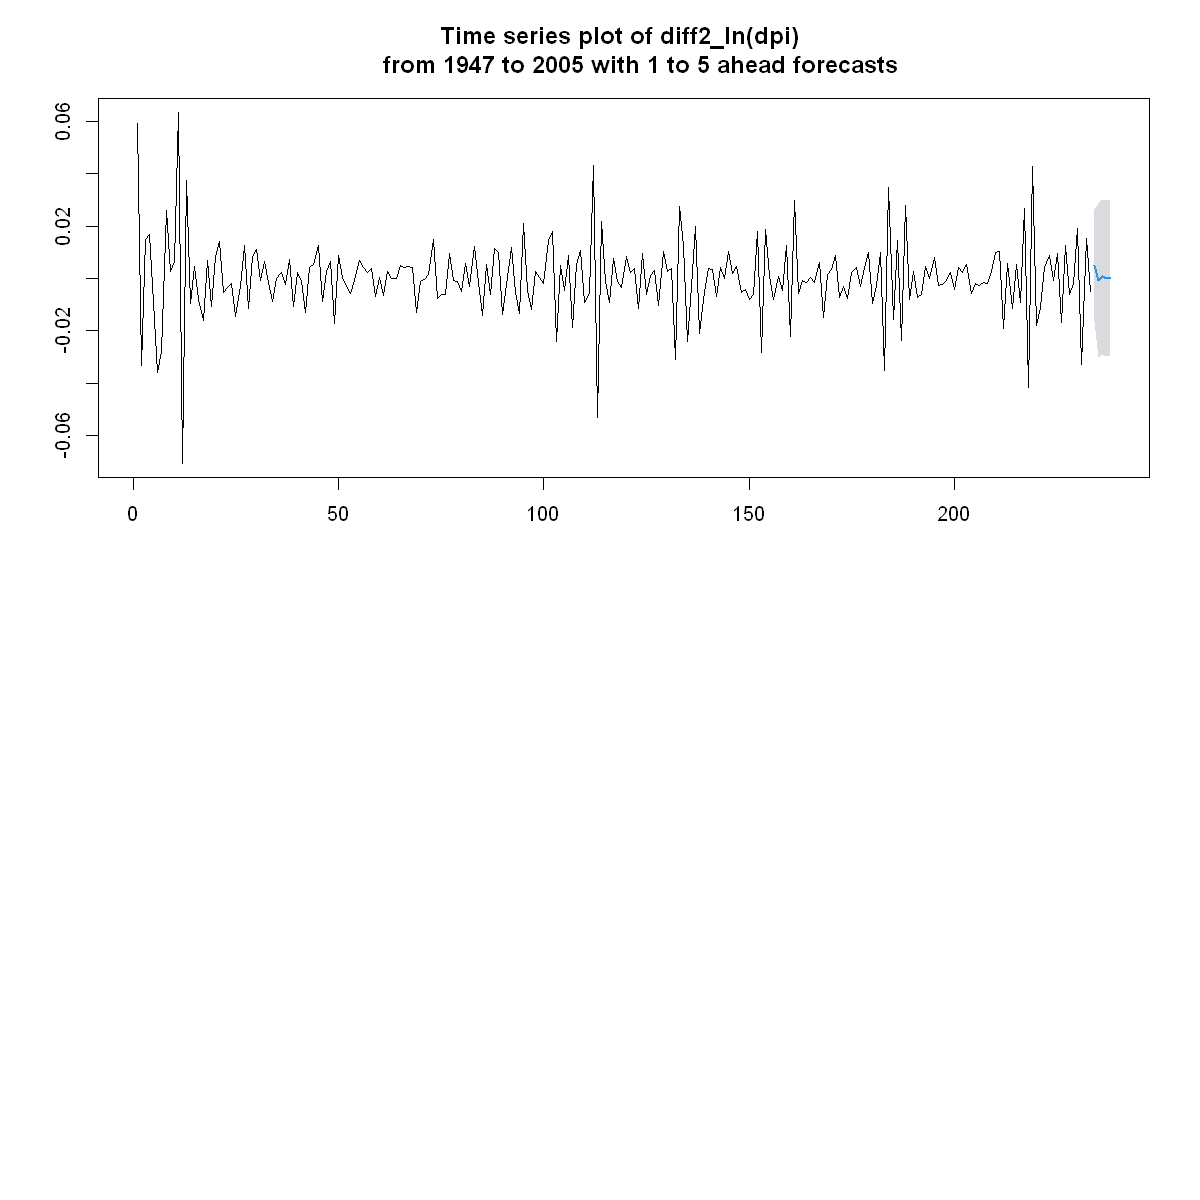

In [23]:
#diff2_ln_dpi
forecast2 <- forecast(fit2, level=c(95), h=5)
forecast2
par(mfrow=c(2,1))
plot(forecast2, main="Time series plot of diff2_ln(dpi) 
     from 1947 to 2005 with 1 to 5 ahead forecasts")

#### Step6. De-transformation

The point-forecast is for diff2_ln(dpi), so we need to de-transform the value to the dpi.

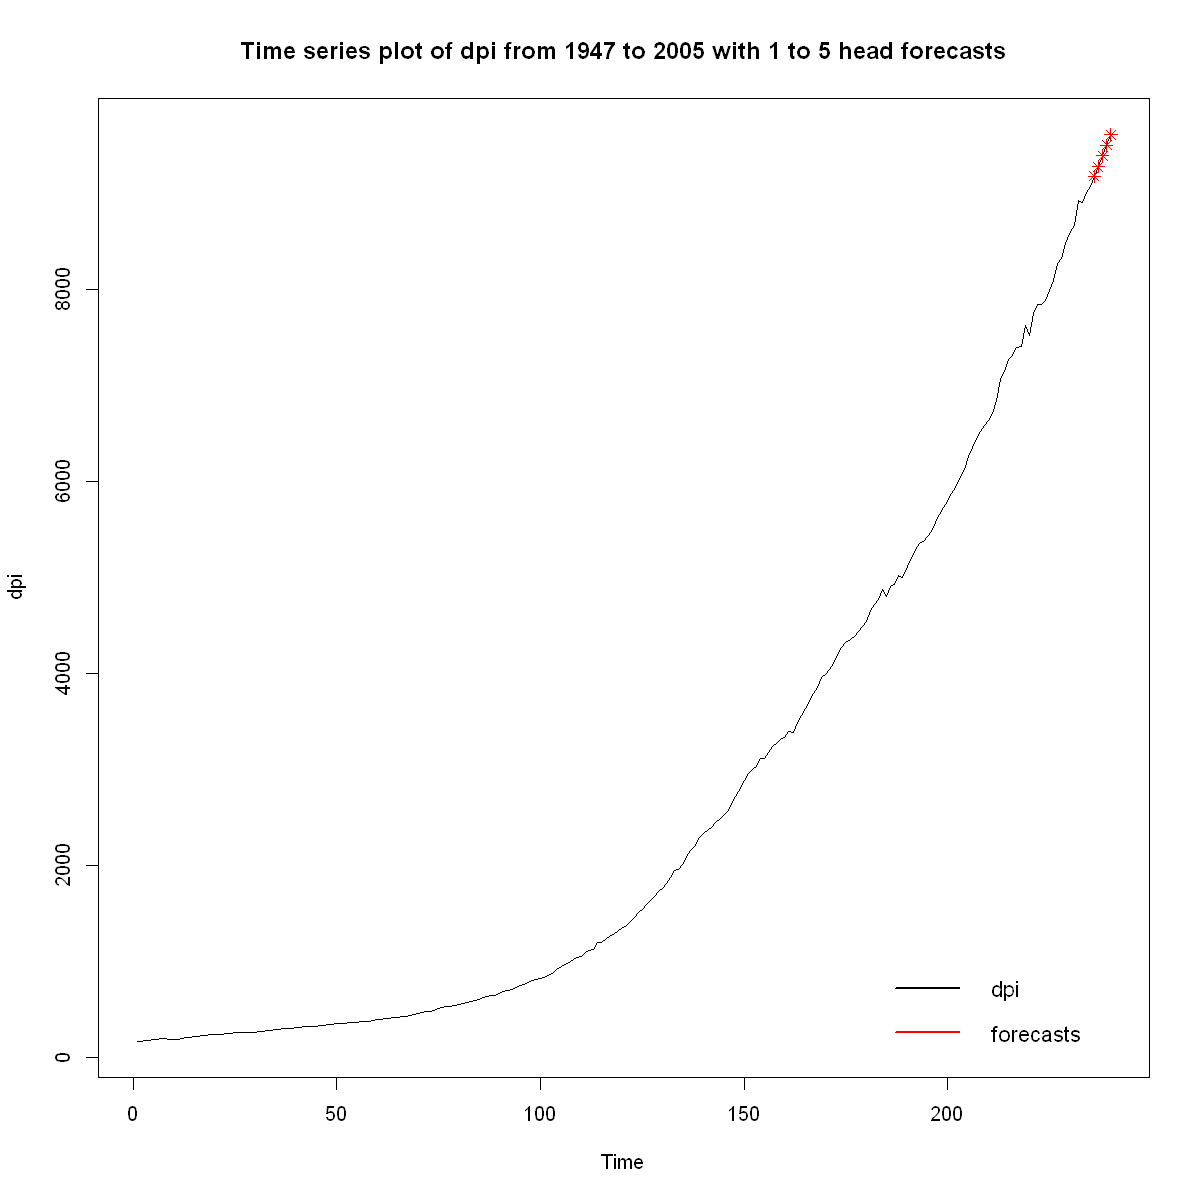

In [25]:
#Combine diff2_ln_dpi and forecasts
forecast_value2<-data.frame(forecast2$mean[1:5])
colnames(forecast_value2)<-"value"

diff2_ln_dpi<-data.frame(diff2_ln_dpi)
colnames(diff2_ln_dpi)<-"value"
total2 <- rbind(diff2_ln_dpi, forecast_value2)

#De-transform to diff1_ln_dpi
detrans_to_diff1_dpi<-c()
cumsum1_dpi<-cumsum(total2)

for (i in 1:dim(total2)[1]+1)
{
  detrans_to_diff1_dpi[1]=diff1_ln_dpi[1]
  if (i>1)
  {detrans_to_diff1_dpi[i]=diff1_ln_dpi[1]+cumsum1_dpi[i-1,]}
}
detrans_to_diff1_dpi<-data.frame(detrans_to_diff1_dpi)

#De-transform to ln_dpi
detrans_to_ln_dpi<-c()
cumsum2_dpi<-cumsum(detrans_to_diff1_dpi)

for (i in 1:dim(cumsum2_dpi)[1]+1)
{
  detrans_to_ln_dpi[1]=ln_dpi[1]
  if (i>1)
  {detrans_to_ln_dpi[i]=ln_dpi[1]+cumsum2_dpi[i-1,]}
}

detrans_to_ln_dpi<-data.frame(detrans_to_ln_dpi)
#De-transform to dpi
detrans_to_dpi<-data.frame(exp(detrans_to_ln_dpi))

ts.plot(detrans_to_dpi, main='Time series plot of dpi from 1947 to 2005 with 1 to 5 head forecasts', col="black", ylab="dpi")

points(x=c(236,237,238,239,240),
       y=c(9178.721727,9281.733396,9391.651488,9501.746177,9613.698266)
      ,col="red", pch = 8)

legend("bottomright", c("dpi","forecasts"), col = c("black", "red")
       ,inset = c(0,0), lty=c(1,1),bty="n", cex = 1.1, lwd = 2 )
